# Set up and Install libs

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [9]:
# dataset path
data_set_source = "./datasets.csv"

# reading dataset and parsing date
df = pd.read_csv(data_set_source, parse_dates=["BILL_DATE"])

C:\Users\vithc\AppData\Local\Temp\ipykernel_39012\222467365.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_set_source, parse_dates=["BILL_DATE"])


# Cleaning Data

In [10]:
# convertion the QTY type from object to int64.
# we need to convert to string this column has mixed value between string and integer number.
# after convert to str we will delete "," comma in number.

df['QTY'] = df['QTY'].astype(str)
df['QTY'] = pd.to_numeric(df['QTY'].str.replace(',', ''), errors='coerce')

# Deleing white all space from string
df['CONSIGNEE_AMPHUR'] = df['CONSIGNEE_AMPHUR'].str.strip()
df['CONSIGNEE_PROVINCE'] = df['CONSIGNEE_PROVINCE'].str.strip()
df['CONSIGNEE_TAMBON'] = df['CONSIGNEE_TAMBON'].str.strip()
df['CONSIGNEE_ZIPCODE'] = df['CONSIGNEE_ZIPCODE'].str.strip()

df['ITEM_CODE'] = df['ITEM_CODE'].str.strip()
df['ITEM_DESCแสดงหน้าบิล'] = df['ITEM_DESCแสดงหน้าบิล'].str.strip()
df['ITEM_NAMEในระบบ'] = df['ITEM_NAMEในระบบ'].str.strip()

df['UNIT_NAME'] = df['UNIT_NAME'].str.strip()

df['DEST_CODE'] = df['DEST_CODE'].str.strip()
df['REG_Code'] = df['REG_Code'].str.strip()

In [11]:
df

,BILL_INDEX,BILL_DATE,CONSIGNEE_TAMBON,CONSIGNEE_AMPHUR,CONSIGNEE_PROVINCE,CONSIGNEE_ZIPCODE,ITEM_CODE,ITEM_DESCแสดงหน้าบิล,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE
0,0,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสารโอทีขนส่ง+โอทียานยนต์+เบี้ยเลี้ยงนอกสถานที่,เอกสาร,1,ซอง,R20,D06
1,1,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสาร,เอกสาร,1,ซอง,R20,D06
2,2,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสาร,เอกสาร,1,ซอง,R20,D06
3,3,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสารใบสมัครงาน,เอกสาร,1,ซอง,R20,D06
4,4,2024-03-01,ป่าสัก,เมืองลำพูน,ลำพูน,51000,10601.229,สินค้าตกค้าง/กันกระแทก,สินค้าตกค้าง,14,ห่อ,R20,D33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184921,1184921,2024-03-31,ช้างคลาน,เมืองเชียงใหม่,เชียงใหม่,,99999.002,ของสด,ของสด,1,ฟญ,R22,D06
1184922,1184922,2024-03-31,หนองผึ้ง,สารภี,เชียงใหม่,50140,99999.002,หมุแผ่น,หมุแผ่น,1,กล่อง,R22,D06
1184923,1184923,2024-03-31,ช้างม่อย,เมืองเชียงใหม่,เชียงใหม่,50300,99999.002,ของสด,ของสด,2,ถัง,R22,D06
1184924,1184924,2024-03-31,NaN,NaN,เชียงใหม่,,99999.005,กาแฟสาร,กาแฟสาร,2,กระสอบ,R05,D06


In [12]:
thai_to_english = {
    'กรุงเทพมหานคร': 'Bangkok',
    'กระบี่': 'Krabi',
    'กาญจนบุรี': 'Kanchanaburi',
    'กาฬสินธุ์': 'Kalasin',
    'กำแพงเพชร': 'Kamphaeng Phet',
    'ขอนแก่น': 'Khon Kaen',
    'จันทบุรี': 'Chanthaburi',
    'ฉะเชิงเทรา': 'Chachoengsao',
    'ชลบุรี': 'Chonburi',
    'ชัยนาท': 'Chai Nat',
    'ชัยภูมิ': 'Chaiyaphum',
    'ชุมพร': 'Chumphon',
    'เชียงราย': 'Chiang Rai',
    'เชียงใหม่': 'Chiang Mai',
    'ตรัง': 'Trang',
    'ตราด': 'Trat',
    'ตาก': 'Tak',
    'นครนายก': 'Nakhon Nayok',
    'นครปฐม': 'Nakhon Pathom',
    'นครพนม': 'Nakhon Phanom',
    'นครราชสีมา': 'Nakhon Ratchasima',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'นครสวรรค์': 'Nakhon Sawan',
    'นนทบุรี': 'Nonthaburi',
    'นราธิวาส': 'Narathiwat',
    'น่าน': 'Nan',
    'บึงกาฬ': 'Bueng Kan',
    'บุรีรัมย์': 'Buri Ram',
    'ปทุมธานี': 'Pathum Thani',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'ปราจีนบุรี': 'Prachin Buri',
    'ปัตตานี': 'Pattani',
    'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พะเยา': 'Phayao',
    'พังงา': 'Phangnga',
    'พัทลุง': 'Phatthalung',
    'พิจิตร': 'Phichit',
    'พิษณุโลก': 'Phitsanulok',
    'เพชรบุรี': 'Phetchaburi',
    'เพชรบูรณ์': 'Phetchabun',
    'แพร่': 'Phrae',
    'ภูเก็ต': 'Phuket',
    'มหาสารคาม': 'Maha Sarakham',
    'มุกดาหาร': 'Mukdahan',
    'แม่ฮ่องสอน': 'Mae Hong Son',
    'ยโสธร': 'Yasothon',
    'ยะลา': 'Yala',
    'ร้อยเอ็ด': 'Roi Et',
    'ระนอง': 'Ranong',
    'ระยอง': 'Rayong',
    'ราชบุรี': 'Ratchaburi',
    'ลพบุรี': 'Lopburi',
    'ลำปาง': 'Lampang',
    'ลำพูน': 'Lamphun',
    'เลย': 'Loei',
    'ศรีสะเกษ': 'Si Sa Ket',
    'สกลนคร': 'Sakon Nakhon',
    'สงขลา': 'Songkhla',
    'สตูล': 'Satun',
    'สมุทรปราการ': 'Samut Prakan',
    'สมุทรสงคราม': 'Samut Songkhram',
    'สมุทรสาคร': 'Samut Sakhon',
    'สระแก้ว': 'Sa Kaeo',
    'สระบุรี': 'Saraburi',
    'สิงห์บุรี': 'Sing Buri',
    'สุโขทัย': 'Sukhothai',
    'สุพรรณบุรี': 'Suphanburi',
    'สุราษฎร์ธานี': 'Surat Thani',
    'สุรินทร์': 'Surin',
    'หนองคาย': 'Nong Khai',
    'หนองบัวลำภู': 'Nong Bua Lam Phu',
    'อ่างทอง': 'Ang Thong',
    'อำนาจเจริญ': 'Amnat Charoen',
    'อุดรธานี': 'Udon Thani',
    'อุตรดิตถ์': 'Uttaradit',
    'อุทัยธานี': 'Uthai Thani',
    'อุบลราชธานี': 'Ubon Ratchathani'
}

df['CONSIGNEE_PROVINCE'] = df['CONSIGNEE_PROVINCE'].replace(thai_to_english)

In [6]:
# df[df['CONSIGNEE_PROVINCE'].isnull()]
df.isnull().sum()

BILL_INDEX                   0
BILL_DATE                    0
CONSIGNEE_TAMBON        328420
CONSIGNEE_AMPHUR        210453
CONSIGNEE_PROVINCE           2
CONSIGNEE_ZIPCODE            0
ITEM_CODE                    0
ITEM_DESCแสดงหน้าบิล         0
ITEM_NAMEในระบบ              0
QTY                          0
UNIT_NAME                    0
REG_Code                     0
DEST_CODE                    1
dtype: int64

In [13]:
df.at[332626, 'CONSIGNEE_PROVINCE'] = 'Chiang Mai'
df.at[671232, 'CONSIGNEE_PROVINCE'] = 'Chiang Mai'

In [14]:
df[df['CONSIGNEE_PROVINCE'].isnull()]

,BILL_INDEX,BILL_DATE,CONSIGNEE_TAMBON,CONSIGNEE_AMPHUR,CONSIGNEE_PROVINCE,CONSIGNEE_ZIPCODE,ITEM_CODE,ITEM_DESCแสดงหน้าบิล,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE


# Extract Data

In [15]:
columns = [
	'BILL_DATE', 'ITEM_DESCแสดงหน้าบิล',
	'CONSIGNEE_PROVINCE',
	'ITEM_NAMEในระบบ', 'QTY', 'UNIT_NAME',
	'REG_Code', 'DEST_CODE'
]
df = df[columns]

In [16]:
df = df[(df['ITEM_NAMEในระบบ'] != 'ค่าขนส่งส่วนเพิ่ม') & (df['ITEM_NAMEในระบบ'] != 'สินค้าตกค้าง')]
df

,BILL_DATE,ITEM_DESCแสดงหน้าบิล,CONSIGNEE_PROVINCE,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE
0,2024-03-01,เอกสารโอทีขนส่ง+โอทียานยนต์+เบี้ยเลี้ยงนอกสถานที่,Chiang Mai,เอกสาร,1,ซอง,R20,D06
1,2024-03-01,เอกสาร,Chiang Mai,เอกสาร,1,ซอง,R20,D06
2,2024-03-01,เอกสาร,Chiang Mai,เอกสาร,1,ซอง,R20,D06
3,2024-03-01,เอกสารใบสมัครงาน,Chiang Mai,เอกสาร,1,ซอง,R20,D06
5,2024-03-01,เหล็กข้างรถเทรเลอร์,Lamphun,เหล็กข้างรถเทรเลอร์,20,ท่อน,R20,D33
...,...,...,...,...,...,...,...,...
1184921,2024-03-31,ของสด,Chiang Mai,ของสด,1,ฟญ,R22,D06
1184922,2024-03-31,หมุแผ่น,Chiang Mai,หมุแผ่น,1,กล่อง,R22,D06
1184923,2024-03-31,ของสด,Chiang Mai,ของสด,2,ถัง,R22,D06
1184924,2024-03-31,กาแฟสาร,Chiang Mai,กาแฟสาร,2,กระสอบ,R05,D06


In [17]:
df = df.rename(columns={"BILL_DATE": 'ds', "ITEM_NAMEในระบบ": "item_name", "QTY": "qty"})
df

,ds,ITEM_DESCแสดงหน้าบิล,CONSIGNEE_PROVINCE,item_name,qty,UNIT_NAME,REG_Code,DEST_CODE
0,2024-03-01,เอกสารโอทีขนส่ง+โอทียานยนต์+เบี้ยเลี้ยงนอกสถานที่,Chiang Mai,เอกสาร,1,ซอง,R20,D06
1,2024-03-01,เอกสาร,Chiang Mai,เอกสาร,1,ซอง,R20,D06
2,2024-03-01,เอกสาร,Chiang Mai,เอกสาร,1,ซอง,R20,D06
3,2024-03-01,เอกสารใบสมัครงาน,Chiang Mai,เอกสาร,1,ซอง,R20,D06
5,2024-03-01,เหล็กข้างรถเทรเลอร์,Lamphun,เหล็กข้างรถเทรเลอร์,20,ท่อน,R20,D33
...,...,...,...,...,...,...,...,...
1184921,2024-03-31,ของสด,Chiang Mai,ของสด,1,ฟญ,R22,D06
1184922,2024-03-31,หมุแผ่น,Chiang Mai,หมุแผ่น,1,กล่อง,R22,D06
1184923,2024-03-31,ของสด,Chiang Mai,ของสด,2,ถัง,R22,D06
1184924,2024-03-31,กาแฟสาร,Chiang Mai,กาแฟสาร,2,กระสอบ,R05,D06


In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
df.to_csv("pure_data.csv")

# ETS

In [147]:
def extract_data_by_item_name_and_group_by(data: pd.DataFrame, datetime_column: str, column: str, filter_value: str, y: str) -> pd.DataFrame:
	filtered_df = data[data[column] == filter_value]
	grouped_df = filtered_df.groupby([datetime_column])[y].sum().reset_index()
	grouped_df = grouped_df.rename(columns={datetime_column: 'ds', y: 'y'})
	return grouped_df

# overshoot is mean forecast average is too high undershoot is too low and it will be negative.
def forecast_kpi(df: pd.DataFrame):
	demand_avg = df.loc[df['Error'].notnull(), 'Demand'].mean()
	bias_abs = df['Error'].mean()
	bias_rel = bias_abs/demand_avg
	print('Bias: {:0.2f}, {:.2%}'.format(bias_abs,bias_rel))
	MAPE = (df['Error'].abs()/df['Demand']).mean()
	print('MAPE: {:.2%}'.format(MAPE))
	MAE_abs = df['Error'].abs().mean()
	MAE_rel = MAE_abs / demand_avg
	print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs, MAE_rel))
	RMSE_abs = np.sqrt((df["Error"] ** 2).mean())
	RMSE_rel = RMSE_abs / demand_avg
	print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs, RMSE_rel))

def seasonal_factors_mul(s, d, slen, cols):
	for i in range(slen):
		s[i] = np.mean(d[i:cols:slen])
	s /= np.mean(s[:slen])
	return s

# Moving Average Model
The Moving Average Model is based on the idea that future demand is smillar to the recent demand we observed.
Where:

f_t is the forecast for period   
n is the number of demand we take average of   
d is the demand during period t   

In [134]:
def moving_average_model(demand: list, extra_periods: int = 1, n=3):
	# Historical periods length
	cols = len(demand)
	# append future times
	demand = np.append(demand, [np.nan] * extra_periods)
	# create forecasting array which fill with NaN
	f = np.full(cols + extra_periods, np.nan)

	for t in range(n, cols):
		f[t] = np.mean(demand[t-n:t])

	f[t+1:] = np.mean(demand[t-n+1:t+1])
	df = pd.DataFrame.from_dict({"Demand": demand, "Forecast": f, "Error": demand-f})
	return df

# Exponential Smoothing
Just as for a moving average, the basic idea of this model is to assume that the future will   
be more or less the same as the (recent) past. The only pattern that this model will be   
able to learn from demand history is its level  

α is a ratio (or a percentage) of how much importance the model will allocate to the  
most recent observation compared to the importance of demand history.  

αdt−1  
represents the learning rate times the previous demand observation. You could  
say that the model attaches certain importance (alpha) to the last demand occurrence.  

(1 − α)f t−1  
represents how much the model remembers from its previous forecast.  
Note that this is where t  

In [85]:
def simple_exponential_smoothing(d, extra_periods=1, alpha=0.4):
	cols = len(d)

	d = np.append(d, [np.nan] * extra_periods)
	f = np.full(cols+extra_periods, np.nan)

	f[1] = d[0]

	for t in range(2, cols+1):
		f[t] = alpha*d[t-1] +(1-alpha)*f[t-1]

	for t in range(cols + 1, cols + extra_periods):
		f[t] = f[t-1]

	df = pd.DataFrame.from_dict({'Demand': d, "Forecast": f, 'Error': d-f})

	return df

In [99]:
def double_exponential_smoothing(d, extra_periods=1, alpha=0.4, beta=0.4):
	# Historical period length
	cols = len(d)
	# Append np.nan into the demand array to cover future periods
	d = np.append(d,[np.nan]*extra_periods)

	# Creation of the level, trend and forecast arrays
	f,a,b = np.full((3,cols+extra_periods),np.nan)

	# Level & Trend initialization
	a[0] = d[0]
	b[0] = d[1] - d[0]

	# Create all the t+1 forecast
	for t in range(1,cols):
		f[t] = a[t-1] + b[t-1]
		a[t] = alpha*d[t] + (1-alpha)*(a[t-1]+b[t-1])
		b[t] = beta*(a[t]-a[t-1]) + (1-beta)*b[t-1]

	# Forecast for all extra periods
	for t in range(cols,cols+extra_periods):
		f[t] = a[t-1] + b[t-1]
		a[t] = f[t]
		b[t] = b[t-1]

	df = pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Level':a,'Trend':b,'Error':d-f})

	return df


In [118]:
def exponential_smoothing_optimization(d, extra_periods=6):
	params = []
	KPIs = []
	dfs = []

	for alpha in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
		df = simple_exponential_smoothing(d, extra_periods=extra_periods, alpha=alpha)
		params.append(f'Simple Smoothing, alpha: {alpha}')
		dfs.append(df)
		# MAE = df['Error'].abs().mean()
		RMSE = np.sqrt((df["Error"] ** 2).mean())
		KPIs.append(RMSE)

		for beta in [0.05, 0.1, 0.2, 0.3, 0.4]:
			df = double_exponential_smoothing(d, extra_periods=extra_periods, alpha=alpha, beta=beta)
			params.append(f'Double Smoothing, alpha: {alpha}, beta: {beta}')
			dfs.append(df)
			RMSE = np.sqrt((df["Error"] ** 2).mean())
			KPIs.append(RMSE)

	mini = np.argmin(KPIs)
	print(f'Best solution found for {params[mini]} RMSE of', round(KPIs[mini], 2))

In [143]:
def damped_double_smoothing(d, extra_periods=1, alpha=0.4, beta=0.4, phi=0.9):
	cols = len(d) # Historical period length
	d = np.append(d,[np.nan]*extra_periods) # Append np.nan into

	f,a,b = np.full((3,cols+extra_periods),np.nan)

	a[0] = d[0]
	b[0] = d[1] - d[0]

	for t in range(1,cols):
		f[t] = a[t-1] + phi*b[t-1]
		a[t] = alpha*d[t] + (1-alpha)*(a[t-1]+phi*b[t-1])
		b[t] = beta*(a[t]-a[t-1]) + (1-beta)*phi*b[t-1]

	for t in range(cols,cols+extra_periods):
		f[t] = a[t-1] + phi*b[t-1]
		a[t] = f[t]
		b[t] = phi*b[t-1]

	df = pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Level':a, 'Trend':b, 'Error':d-f})

	return df


In [148]:
def triple_exponential_smoothing_mul(d, slen=12, extra_periods=1, alpha=0.4, beta=0.4, phi=0.9, gamma=0.3):
	cols = len(d) # Historical pteriod length
	d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods

	# components initialization
	f,a,b,s = np.full((4,cols+extra_periods),np.nan)
	s = seasonal_factors_mul(s,d,slen,cols)

	# Level & Trend initialization
	a[0] = d[0]/s[0]
	b[0] = d[1]/s[1] - d[0]/s[0]

	# Create the forecast for the first season
	for t in range(1,slen):
		f[t] = (a[t-1] + phi*b[t-1])*s[t]
		a[t] = alpha*d[t]/s[t] + (1-alpha)*(a[t-1]+phi*b[t-1])
		b[t] = beta*(a[t]-a[t-1]) + (1-beta)*phi*b[t-1]

	for t in range(slen,cols):
		f[t] = (a[t-1] + phi*b[t-1])*s[t-slen]
		a[t] = alpha*d[t]/s[t-slen] + (1-alpha)*(a[t-1]+phi*b[t-1])
		b[t] = beta*(a[t]-a[t-1]) + (1-beta)*phi*b[t-1]
		s[t] = gamma*d[t]/a[t] + (1-gamma)*s[t-slen]

	for t in range(cols,cols+extra_periods):
		f[t] = (a[t-1] + phi*b[t-1])*s[t-slen]
		a[t] = f[t]/s[t-slen]
		b[t] = phi*b[t-1]
		s[t] = s[t-slen]

	df = pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Level':a,'Trend':b,'Season':s,'Error':d-f})

	return df


# Excluded Outlier

In [200]:
document_df = extract_data_by_item_name_and_group_by(data=df, datetime_column='ds', column='item_name', filter_value='เอกสาร', y='qty')
document_df.head(5).to_dict()

{'ds': {0: Timestamp('2024-01-02 00:00:00'),
  1: Timestamp('2024-01-03 00:00:00'),
  2: Timestamp('2024-01-04 00:00:00'),
  3: Timestamp('2024-01-05 00:00:00'),
  4: Timestamp('2024-01-06 00:00:00')},
 'y': {0: 12, 1: 23, 2: 15, 3: 28, 4: 9}}

In [196]:
def detection_and_delete_outlier(data: pd.DataFrame, column: str) -> pd.DataFrame:
	stat = data[column].describe()
	Q1 = stat['25%']
	Q2 = stat['50%']  # Median (not used for outlier detection here, but calculated)
	Q3 = stat['75%']
	IQR = Q3 - Q1

	# Define the lower and upper bounds for outliers
	lower_bound = Q1 - (1.5 * IQR)
	upper_bound = Q3 + (1.5 * IQR)

	# Filter the DataFrame to remove outliers
	filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

	return filtered_data

def detection_and_delete_outlier_by_std(data: pd.DataFrame, column: str, num_std: float = 3.0):
	"""
	Delete rows in the DataFrame where the values in the specified column are
	more than 'num_std' standard deviations away from the mean.

	:param data: The input DataFrame.
	:param column: The column to check for outliers.
	:param num_std: The number of standard deviations from the mean to use as the threshold.
	:return: The DataFrame with outliers removed.
	"""
	mean = data[column].mean()
	std_dev = data[column].std()

	# Define the lower and upper bounds for outliers
	lower_bound = mean - (num_std * std_dev)
	upper_bound = mean + (num_std * std_dev)

	# Filter the DataFrame to remove outliers
	filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

	return filtered_data

# Statistical Forecasting Model

Item: เอกสาร
Item lenght before delete outlier:  172
Item lenght after delete outlier:  169


Simple Exponential Smoothing Model
     Demand   Forecast      Error
123    23.0  20.656404   2.343596
124    24.0  20.773583   3.226417
125    17.0  20.934904  -3.934904
126     4.0  20.738159 -16.738159
127    34.0  19.901251  14.098749
128    21.0  20.606189   0.393811
129     6.0  20.625879 -14.625879
130    26.0  19.894585   6.105415
131    12.0  20.199856  -8.199856
132    20.0  19.789863   0.210137
133     1.0  19.800370 -18.800370
134    17.0  18.860351  -1.860351
135    25.0  18.767334   6.232666
136    22.0  19.078967   2.921033
137    22.0  19.225019   2.774981
138    21.0  19.363768   1.636232
139    18.0  19.445580  -1.445580
140     3.0  19.373301 -16.373301
141    53.0  18.554636  34.445364
142    20.0  20.276904  -0.276904
143    22.0  20.263059   1.736941
144    36.0  20.349906  15.650094
145    24.0  21.132410   2.867590
146    18.0  21.275790  -3.275790
147     3.0  21.11200

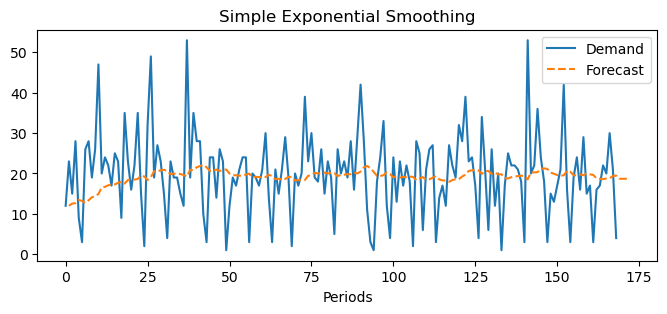

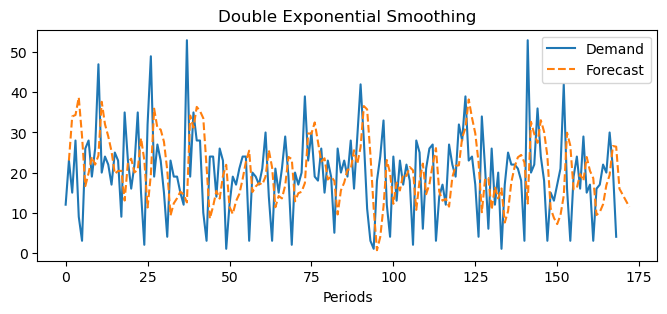

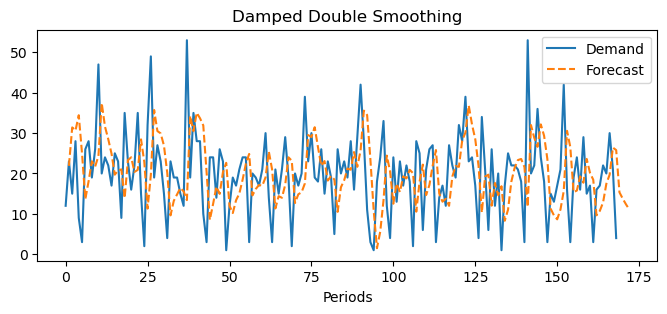

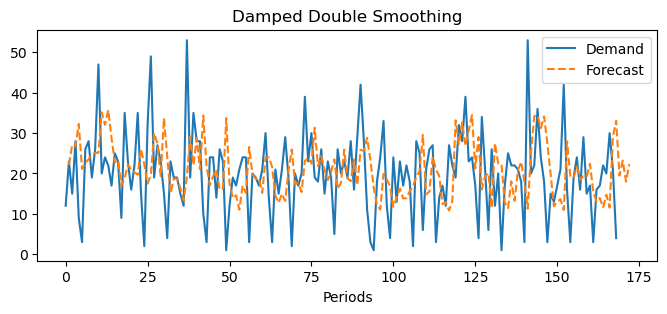

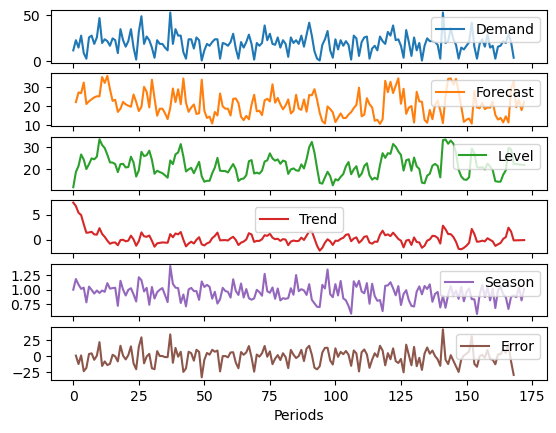

In [198]:
item_name = 'เอกสาร'
item_data_df = df.copy()
item_data_df = extract_data_by_item_name_and_group_by(item_data_df, 'ds', 'item_name', item_name, y='qty')
print("Item:", item_name)
print('Item lenght before delete outlier: ', len(item_data_df))
item_data_df = detection_and_delete_outlier_by_std(item_data_df, 'y')
print('Item lenght after delete outlier: ', len(item_data_df))
print('\n')

# print("Moving Average Model")
# moving_avg_result = moving_average_model(demand=item_data_df['y'], extra_periods=4, n=3)
# print(moving_avg_result.tail(10))
# moving_avg_result[['Demand', 'Forecast']].plot(figsize=(8, 3), title="Moving Average", style=['-', '--'])
# forecast_kpi(moving_avg_result)
# print('\n')

print("Simple Exponential Smoothing Model")
simple_exponential_smoothing_result = simple_exponential_smoothing(
	d=item_data_df['y'],
	alpha=0.05,
	extra_periods=4,
)
print(simple_exponential_smoothing_result.tail(50))
simple_exponential_smoothing_result.index.name = "Periods"
simple_exponential_smoothing_result[['Demand', 'Forecast']].plot(figsize=(8,3), title="Simple Exponential Smoothing", style=['-', '--'])
forecast_kpi(simple_exponential_smoothing_result)
print('\n')

print("Double Exponential Smoothing Model")
double_exponential_smoothing_result = double_exponential_smoothing(
	d=item_data_df['y'],
	extra_periods=4,
)
print(double_exponential_smoothing_result.tail(10))
double_exponential_smoothing_result.index.name = "Periods"
double_exponential_smoothing_result[['Demand', 'Forecast']].plot(figsize=(8,3), title="Double Exponential Smoothing", style=['-', '--'])
forecast_kpi(double_exponential_smoothing_result)
print('\n')

print("Damped Double Smoothing")
damped_double_smoothing_result = damped_double_smoothing(d=item_data_df['y'], extra_periods=4)
print(damped_double_smoothing_result.tail(10))
damped_double_smoothing_result.index.name = "Periods"
damped_double_smoothing_result[['Demand', 'Forecast']].plot(figsize=(8,3), title="Damped Double Smoothing", style=['-', '--'])
forecast_kpi(damped_double_smoothing_result)
print('\n')


triple_exponential_smoothing_mul_result = triple_exponential_smoothing_mul(item_data_df['y'], slen=12, extra_periods=4, alpha=0.3, beta=0.2, phi=0.9, gamma=0.2)
print(triple_exponential_smoothing_mul_result.tail(10))
triple_exponential_smoothing_mul_result.index.name = "Periods"
triple_exponential_smoothing_mul_result[['Demand', 'Forecast']].plot(figsize=(8,3), title="Damped Double Smoothing", style=['-', '--'])
triple_exponential_smoothing_mul_result.plot(subplots=True)
forecast_kpi(triple_exponential_smoothing_mul_result)
print('\n')

print("Exponential Smoothing Optimization Model")
exponential_smoothing_opti_result = exponential_smoothing_optimization(
	d=item_data_df['y'],
)

# Pad Ped Model

In [205]:
from prophet import Prophet

def prophet_forecasting(data: pd.DataFrame, periods: int = 4, freq: str = 'D') -> pd.DataFrame:
	"""
	Perform time series forecasting using the Prophet model.

	:param data: DataFrame containing the historical data with 'ds' for dates and 'y' for values.
	:param periods: Number of periods to forecast into the future.
	:param freq: Frequency of the predictions (e.g., 'D' for daily, 'W' for weekly).
	:return: DataFrame containing the forecasted values with 'ds', 'yhat', 'yhat_lower', and 'yhat_upper'.
	"""
	# Initialize the Prophet model
	model = Prophet()

	# Fit the model with historical data
	model.fit(data)

	# Create a DataFrame to hold future dates for prediction
	future = model.make_future_dataframe(periods=periods, freq=freq)

	# Perform the prediction
	forecast = model.predict(future)

	# Return the forecasted results
	# return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
	return pd.DataFrame.from_dict({'ds': forecast['ds'], 'y': data['y'], 'yhat': forecast['yhat'], 'yhat_lower': forecast['yhat_lower'], 'yhat_upper': forecast['yhat_upper'], 'error': data['y'] - forecast['yhat']})

In [206]:
prophet_forecasting_result = prophet_forecasting(data=item_data_df)
prophet_forecasting_result

14:39:55 - cmdstanpy - INFO - Chain [1] start processing
14:39:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,y,yhat,yhat_lower,yhat_upper,error
0,2024-01-02,12.0,22.509696,13.175801,32.113382,-10.509696
1,2024-01-03,23.0,20.613359,11.868642,29.909631,2.386641
2,2024-01-04,15.0,23.947198,14.325357,33.389893,-8.947198
3,2024-01-05,28.0,26.982196,17.599815,35.755266,1.017804
4,2024-01-06,9.0,18.546004,8.935726,28.238414,-9.546004
...,...,...,...,...,...,...
168,2024-06-30,20.0,2.098574,-7.648733,12.152641,17.901426
169,2024-07-01,30.0,23.681104,14.470912,33.294456,6.318896
170,2024-07-02,21.0,20.511132,10.990712,30.090155,0.488868
171,2024-07-03,4.0,18.614795,9.453598,27.738663,-14.614795
